<a href="https://colab.research.google.com/github/MissAzie/Machine-Learning-Projects/blob/main/Updated_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install libraries
!pip install pyswarms
!pip install geneticalgorithm

In [ ]:
!pip install pygad pyswarm


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=61dd17f2ef063df20b4fd0e4bf8668f4cdfb9ca2b801b6c6b285d4c52f517b96
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.optimize import linprog
import pygad
from pyswarm import pso

In [ ]:
# Load dataset
df = pd.read_csv("/content/electric_10_2023.csv")

# Convert timestamps to datetime format
df["interval_start"] = pd.to_datetime(df["interval_start"])
df["interval_end"] = pd.to_datetime(df["interval_end"])

# Sort data by time
df = df.sort_values(by="interval_start")

# Drop missing values
df = df.dropna()

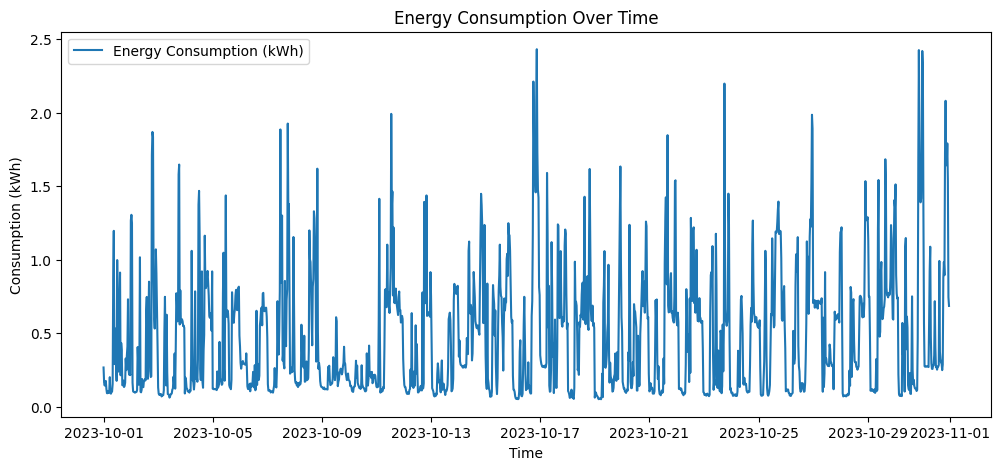

In [ ]:
# Visualizing consumption trends
plt.figure(figsize=(12, 5))
plt.plot(df["interval_start"], df["consumption"], label="Energy Consumption (kWh)")
plt.xlabel("Time")
plt.ylabel("Consumption (kWh)")
plt.title("Energy Consumption Over Time")
plt.legend()
plt.show()

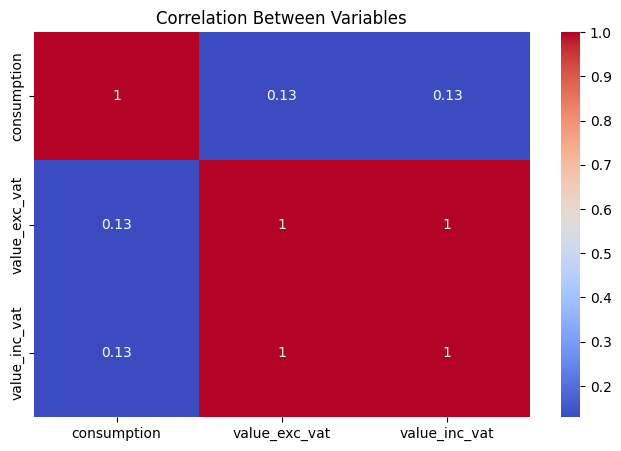

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[["consumption", "value_exc_vat", "value_inc_vat"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()

In [ ]:
# Scaling data for LSTM model
scaler = MinMaxScaler()
df["consumption_scaled"] = scaler.fit_transform(df[["consumption"]])

# Prepare data for LSTM
X, y = [], []
seq_length = 10  # Using last 10 intervals to predict next consumption
for i in range(len(df) - seq_length):
    X.append(df["consumption_scaled"].values[i:i+seq_length])
    y.append(df["consumption_scaled"].values[i+seq_length])
X, y = np.array(X), np.array(y)

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
model.fit(X, y, epochs=20, batch_size=16, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0339
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0226
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0168
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0164
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0144
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0149
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0122
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0129
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0135
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0139
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0125
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0133
Epoc

In [ ]:
# Forecast Future Consumption
future_steps = 48
predictions = []
input_seq = X[-1]
for _ in range(future_steps):
    prediction = model.predict(input_seq.reshape(1, seq_length, 1))
    predictions.append(prediction[0][0])
    input_seq = np.roll(input_seq, -1)
    input_seq[-1] = prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


<ipython-input-15-98cd65d4bac1>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_seq[-1] = prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

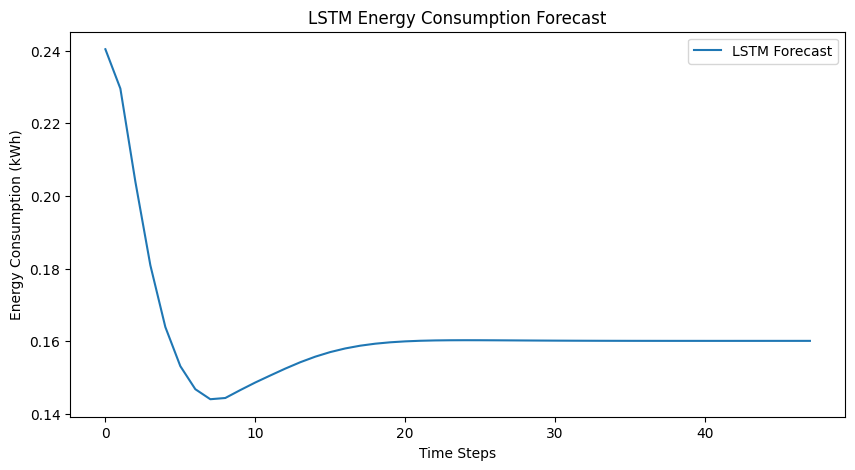

In [ ]:
# Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(range(len(predictions)), predictions, label="LSTM Forecast")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.title("LSTM Energy Consumption Forecast")
plt.show()

Stopping search: maximum iterations reached --> 100
MILP Optimized Cost: 3749.273789999968
GA Optimized Cost: 31018.92129291098
PSO Optimized Cost: 5867.330153354056


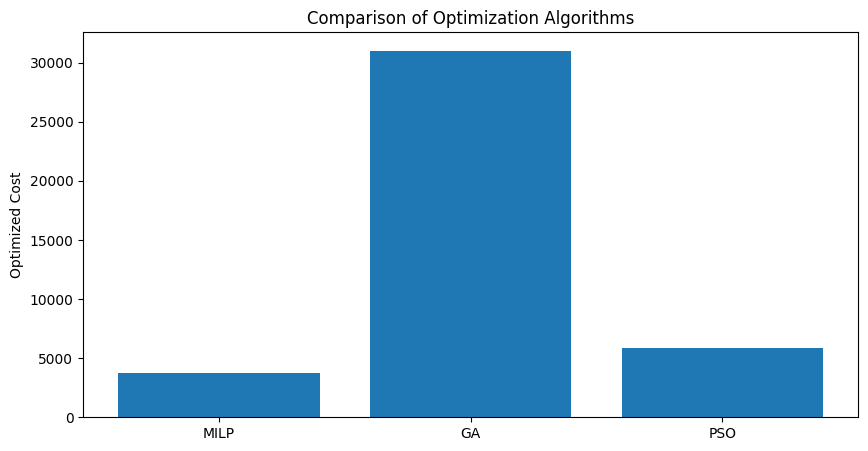

In [ ]:
# Optimization using MILP
c = df["value_exc_vat"].values  # Cost coefficients
A_eq = np.ones((1, len(c)))  # Demand constraint
b_eq = [np.sum(df["consumption"].values)]  # Total demand should match
bounds = [(0, max(df["consumption"].values))] * len(c)
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Optimization using GA
import pygad
import numpy as np

# Define the fitness function with 3 parameters
def fitness_function(ga_instance, solution, solution_idx):
    solution = np.array(solution)  # Ensure it's an array
    return -np.sum(solution * df["value_exc_vat"].values)  # Minimize cost

# Configure GA
ga_instance = pygad.GA(num_generations=50,
                        num_parents_mating=5,
                        fitness_func=fitness_function,
                        sol_per_pop=10,
                        num_genes=df.shape[0],  # Ensure correct shape
                        gene_space={'low': 0, 'high': df["consumption"].max()})  # Set valid range

# Run the GA optimization
ga_instance.run()



# Optimization using PSO
def objective_function(x):
    return np.sum(x * df["value_exc_vat"].values)

lb = [0] * len(df)
ub = list(df["consumption"].values)
best_x, best_f = pso(objective_function, lb, ub)

# Display optimization results
print("MILP Optimized Cost:", res.fun)
print("GA Optimized Cost:", -ga_instance.best_solution()[1])
print("PSO Optimized Cost:", best_f)

plt.figure(figsize=(10,5))
plt.bar(["MILP", "GA", "PSO"], [res.fun, -ga_instance.best_solution()[1], best_f])
plt.ylabel("Optimized Cost")
plt.title("Comparison of Optimization Algorithms")
plt.show()
